In [8]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,os,warnings,csv

import torch
from torch import functional as F
from torch import optim

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import astropy.units as u
from astropy import coordinates as coord

from astroquery import skyview as sv

from scipy import ndimage

In [122]:
def grab_fits(c_coord,c_scale=(25*u.arcminute,25*u.arcminute),surveys=['DSS','DSS1 Blue','DSS1 Red','DSS2 Red','DSS2 Blue','DSS2 IR'],c_zoom=1):
    paths = view.get_images(position=c_coord,survey=surveys,height=c_scale[0],width=c_scale[1])
    images = [ndimage.zoom(path[0].data,c_zoom) for path in paths]
    return images,paths

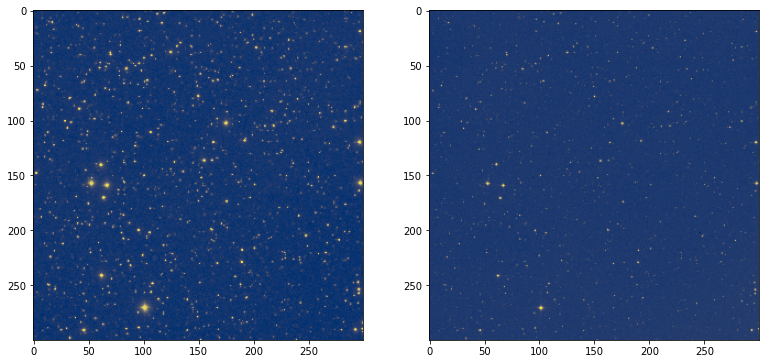

In [116]:
img0,paths0 = grab_fits(
    coord.SkyCoord(ra=30*u.degree,dec=45*u.degree,unit=('deg','deg'),frame='icrs')
)
img1,paths1 = grab_fits(
    coord.SkyCoord(ra=10*u.degree,dec=15*u.degree,unit=('deg','deg'),frame='icrs')
)

fig,ax = plt.subplots(1,2,figsize=(13,13))

ax[0].imshow(img0[0],cmap='cividis')
ax[1].imshow(img0[-1],cmap='cividis')

plt.show()

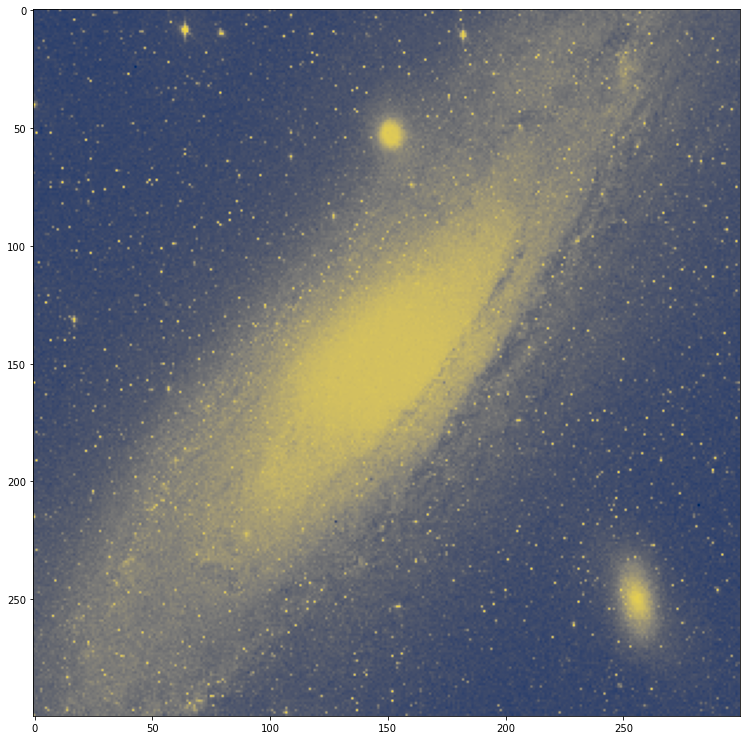

In [123]:
ccoord = coord.SkyCoord.from_name('M31',frame='icrs')
img,paths = grab_fits(ccoord,c_scale=(75,75)*u.arcminute)

fig,ax = plt.subplots(1,1,figsize=(13,13))
ax.imshow(img[0],cmap='cividis')

plt.show()

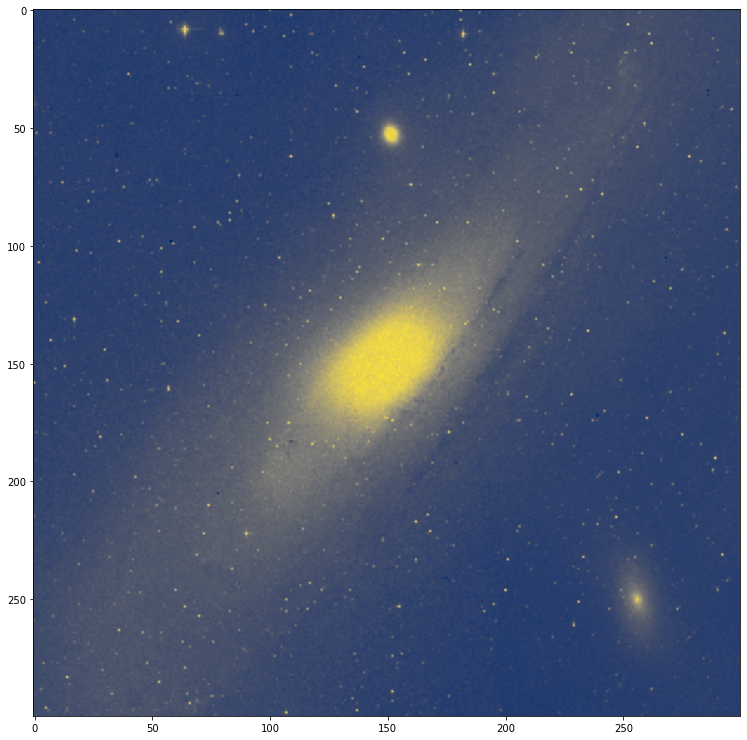

In [118]:
fig,ax = plt.subplots(1,1,figsize=(13,13))
ax.imshow(img[-1],cmap='cividis')

plt.show()

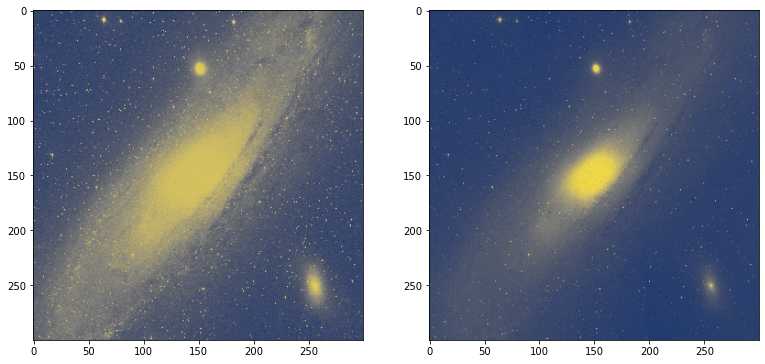

In [119]:
fig,ax = plt.subplots(1,2,figsize=(13,13))

ax[0].imshow(img[0],cmap='cividis')
ax[1].imshow(img[-1],cmap='cividis')

plt.show()

In [125]:
view.survey_dict

{'GammaRay': ['Fermi 5',
  'Fermi 4',
  'Fermi 3',
  'Fermi 2',
  'Fermi 1',
  'EGRET (3D)',
  'EGRET <100 MeV',
  'EGRET >100 MeV',
  'COMPTEL'],
 'HardX-ray': ['INT GAL 17-35 Flux',
  'INT GAL 17-60 Flux',
  'INT GAL 35-80 Flux',
  'INTEGRAL/SPI GC',
  'GRANAT/SIGMA',
  'RXTE Allsky 3-8keV Flux',
  'RXTE Allsky 3-20keV Flux',
  'RXTE Allsky 8-20keV Flux'],
 'X-ray:SwiftBAT': ['BAT SNR 14-195',
  'BAT SNR 14-20',
  'BAT SNR 20-24',
  'BAT SNR 24-35',
  'BAT SNR 35-50',
  'BAT SNR 50-75',
  'BAT SNR 75-100',
  'BAT SNR 100-150',
  'BAT SNR 150-195'],
 'SoftX-ray class=': ['SwiftXRTCnt',
  'SwiftXRTExp',
  'SwiftXRTInt',
  'HEAO 1 A-2'],
 'ROSATw/sources class=': ['RASS-Cnt Soft',
  'RASS-Cnt Hard',
  'RASS-Cnt Broad',
  'PSPC 2.0 Deg-Int',
  'PSPC 1.0 Deg-Int',
  'PSPC 0.6 Deg-Int',
  'HRI'],
 'ROSATDiffuse class=': ['RASS Background 1',
  'RASS Background 2',
  'RASS Background 3',
  'RASS Background 4',
  'RASS Background 5',
  'RASS Background 6',
  'RASS Background 7'],
 'UV': ['GA

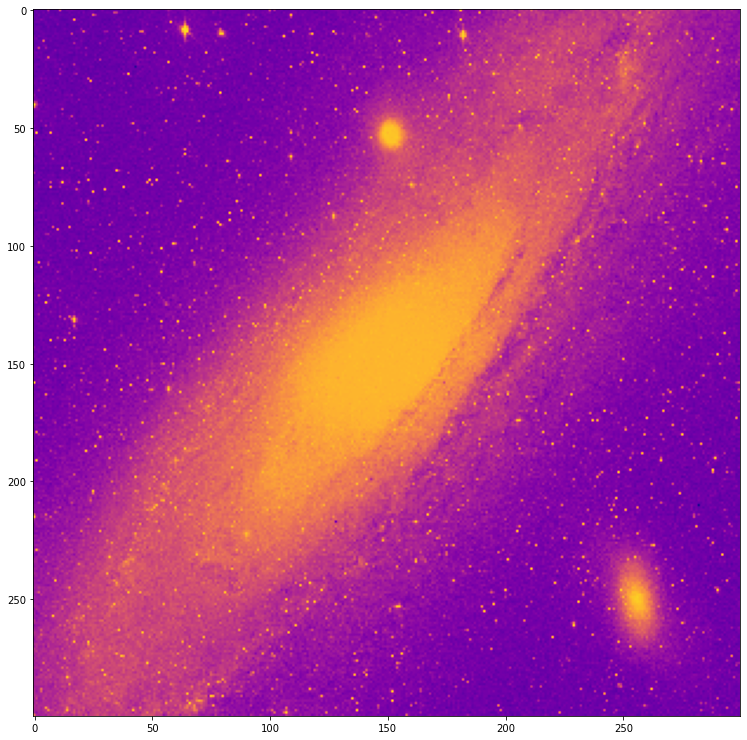

In [128]:
fig,ax = plt.subplots(1,1,figsize=(13,13))
ax.imshow(img[0],cmap='plasma')

plt.show()

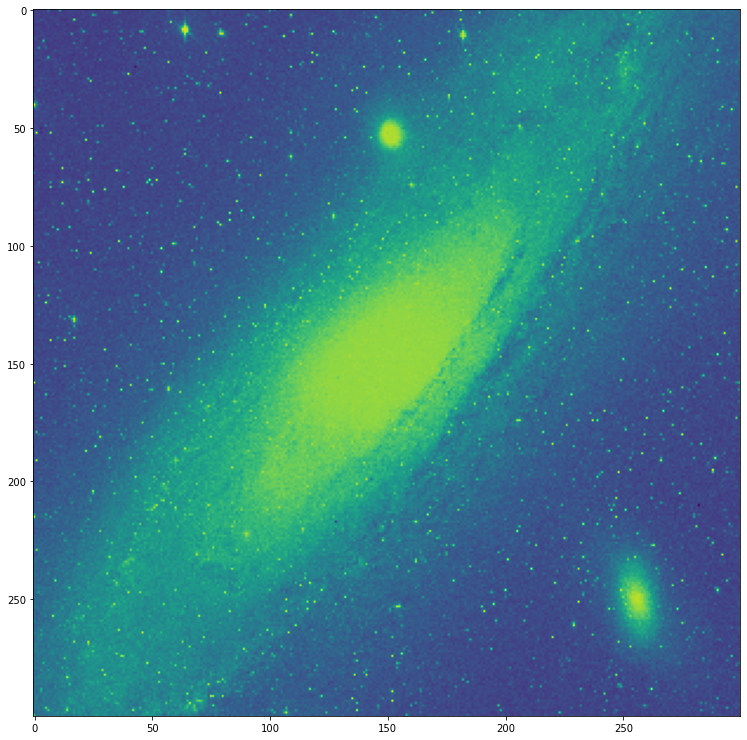

In [146]:
tmp1 = img[1]

c_min = tmp1.min()
c_max = tmp1.max()

tmp1 = 255*((tmp1 - c_min)/c_max)
tmp1 = tmp1.astype(np.int32)

fig,ax = plt.subplots(1,1,figsize=(13,13))
ax.imshow(tmp1)

plt.show()

In [147]:
tmp.shape

(300, 300)